In [1]:
import pandas as pd

# Load the dataset
file_path = 'summer-products-with-rating-and-performance_2020-08.csv'
sales_data = pd.read_csv(file_path)

The dataset used in this project, titled "Summer Products and Sales in eCommerce Wish," is derived from data scraped from the eCommerce platform Wish. The data reflects products that appear when "summer" is searched on the platform, particularly during the summer of 2020. It contains various attributes related to summer products, including product prices, ratings, shipping durations, and sales figures.

The data was initially scraped in French, resulting in some non-ASCII characters within the product titles, and was processed from JSON format into CSV for compatibility.

In [2]:
sales_data.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [3]:
# Display initial information about the dataset

print("\nSummary of initial data:")
print(sales_data.describe())



Summary of initial data:
             price  retail_price     units_sold  uses_ad_boosts       rating  \
count  1573.000000   1573.000000    1573.000000     1573.000000  1573.000000   
mean      8.325372     23.288620    4339.005086        0.432931     3.820896   
std       3.932030     30.357863    9356.539302        0.495639     0.515374   
min       1.000000      1.000000       1.000000        0.000000     1.000000   
25%       5.810000      7.000000     100.000000        0.000000     3.550000   
50%       8.000000     10.000000    1000.000000        0.000000     3.850000   
75%      11.000000     26.000000    5000.000000        1.000000     4.110000   
max      49.000000    252.000000  100000.000000        1.000000     5.000000   

       rating_count  rating_five_count  rating_four_count  rating_three_count  \
count   1573.000000        1528.000000        1528.000000         1528.000000   
mean     889.659250         442.263743         179.599476          134.549738   
std     19


**Insights**:<br>
Price Sensitivity: The significant difference between price and retail_price suggests a strong emphasis on discounts, likely to encourage sales volume.<br>
Ad Boost Impact: Products with uses_ad_boosts set to 1 appear to have a higher units_sold, suggesting ad boosts are effective in driving sales.<br>
Inventory Capping: The consistent inventory_total at 50 implies inventory limitations, possibly due to demand or supply constraints.<br>
Shipping Limitation: Limited express shipping options could influence customers seeking faster delivery, impacting the overall buying decision.<br>
These observations provide a clearer view of pricing strategies, sales patterns, and operational constraints, which can guide further analysis on marketing strategies, inventory management, and customer satisfaction.

In [4]:
sales_data.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

**Drop Columns with High Missing Values:**

Columns with over 50% missing values were dropped to reduce noise. For instance, the has_urgency_banner and merchant_profile_picture columns had a high rate of missing values.


In [5]:
# Handle missing values
# Drop columns with more than 50% missing values (if any)
threshold = len(sales_data) * 0.5
sales_data = sales_data.dropna(thresh=threshold, axis=1)

In [6]:
sales_data.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


**Handle Remaining Missing Values:**

For numeric columns, missing values were filled with the column mean.<br>
For categorical columns, missing values were filled with the column mode.

In [7]:
# Fill remaining missing values with column mean for numerical columns and mode for categorical columns
for column in sales_data.columns:
    if sales_data[column].dtype == 'object':
        sales_data[column].fillna(sales_data[column].mode()[0], inplace=True)
    else:
        sales_data[column].fillna(sales_data[column].mean(), inplace=True)

In [8]:
# Save cleaned data to a new CSV file
sales_data.to_csv('cleaned_summer_products.csv', index=False)

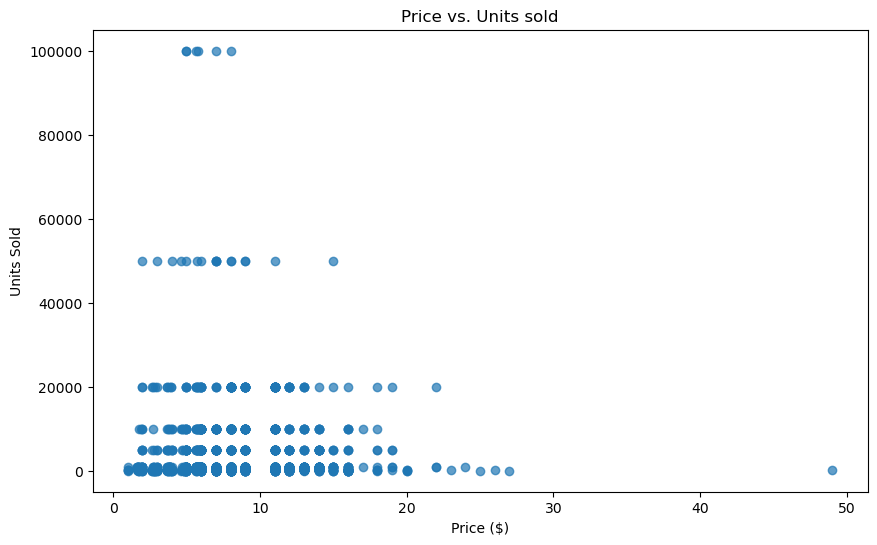

In [9]:
import matplotlib.pyplot as plt

cleaned_sales=pd.read_csv("cleaned_summer_products.csv")
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_sales['price'], cleaned_sales['units_sold'], alpha=0.7)
plt.title('Price vs. Units sold')
plt.xlabel('Price ($)')
plt.ylabel('Units Sold')
plt.show()

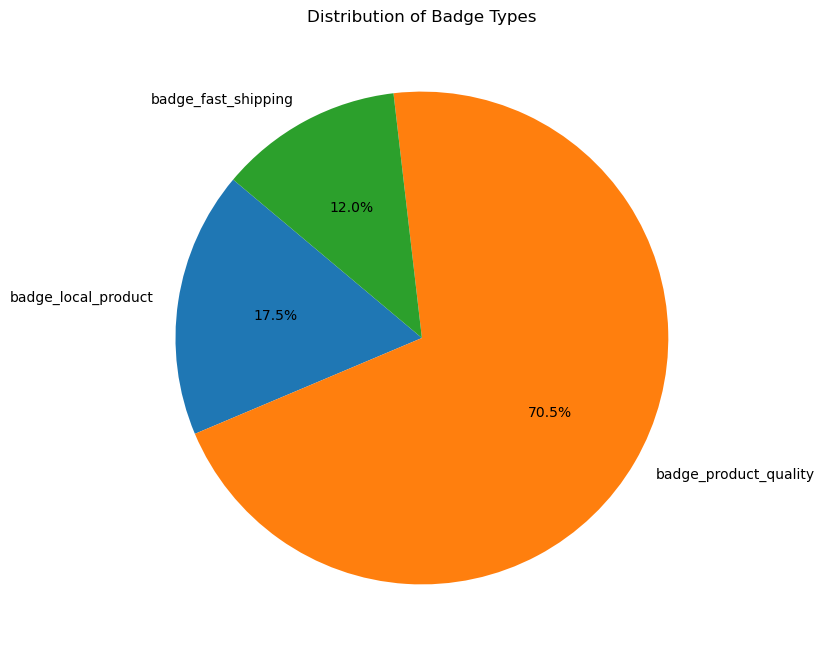

In [10]:
badge_sums = cleaned_sales[['badge_local_product', 'badge_product_quality', 'badge_fast_shipping']].sum()
plt.figure(figsize=(8, 8))
plt.pie(badge_sums, labels=badge_sums.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Badge Types')
plt.show()

This plot offers insights into the quality and shipping standards of products, indicating which badges are prioritized on the platform.

In [11]:
cleaned_sales.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture', 'product_url',
       'product_picture', 'product_id', 'theme', 'crawl_month'],
      dtype='object')

**Bar Chart - Units Sold by Product Color**:
This bar chart shows the average units sold for each product color. It helps identify the most popular colors for summer products, which can inform inventory and marketing strategies.

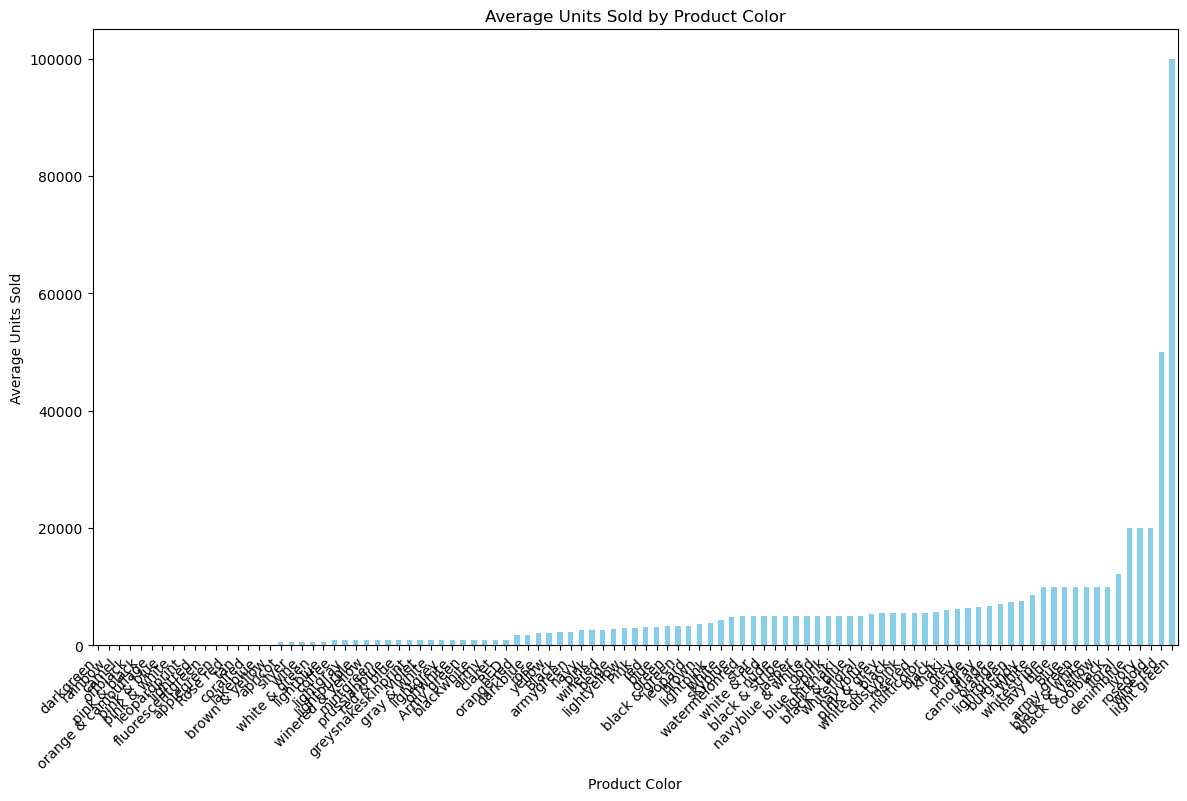

In [12]:
plt.figure(figsize=(14, 8))  # Increased figure size for better spacing
color_sales = cleaned_sales.groupby('product_color')['units_sold'].mean().sort_values()
color_sales.plot(kind='bar', color='skyblue')
plt.title('Average Units Sold by Product Color')
plt.xlabel('Product Color')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=45, ha='right')  # Rotating labels for better readability
plt.show()

**Histogram - Distribution of Product Ratings**<br>
**Explanation:** This histogram displays the distribution of product ratings, revealing the overall quality and customer satisfaction. A higher concentration on the right side would indicate a trend of high-rated products.

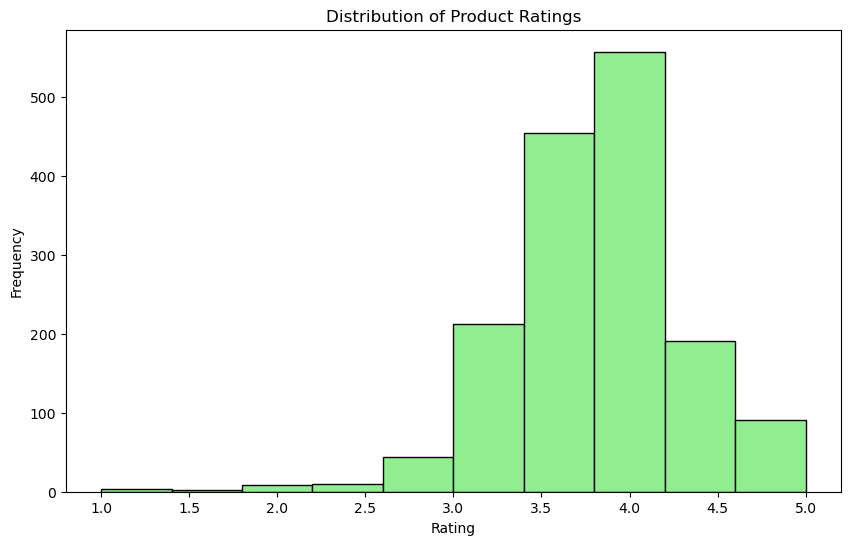

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(cleaned_sales['rating'].dropna(), bins=10, edgecolor='black', color='lightgreen')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


## Milestone3

##### Scatter Plot: Price vs. Units Sold
This plot visualizes the relationship between the product price and the number of units sold.
It includes color grading based on the rating to add another layer of information, helping identify how ratings vary with price and sales volume.
##### Interactive Elements:

Dropdown: Filters the scatter plot by origin_country, allowing the user to see trends for products from specific countries.

Zooming and Panning: Enabled through dragmode='zoom', allowing detailed inspection of data points.

Hover Tooltips: Provides additional information on each point, including the title, rating, and origin_country.


In [18]:
import plotly.graph_objs as go
from ipywidgets import widgets, VBox
def create_scatter(filtered_df):
    scatter = go.FigureWidget(
        data=[
            go.Scatter(
                x=filtered_df['price'],
                y=filtered_df['units_sold'],
                mode='markers',
                marker=dict(
                    size=10,
                    color=filtered_df['rating'],  # Color by rating
                    colorscale='Viridis',
                    showscale=True
                ),
                text=filtered_df[['title', 'rating', 'origin_country']],
                hovertemplate=(
                    '<b>%{text[0]}</b><br>'
                    'Rating: %{text[1]:.1f}<br>'
                    'Origin: %{text[2]}<br>'
                    'Price: %{x}<br>'
                    'Units Sold: %{y}<extra></extra>'
                )
            )
        ]
    )
    scatter.update_layout(
        title='Price vs. Units Sold',
        xaxis_title='Price ($)',
        yaxis_title='Units Sold',
        dragmode='zoom',
        template='plotly_white'
    )
    return scatter

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=['All'] + list(cleaned_sales['origin_country'].unique()),
    value='All',
    description='Country:',
    style={'description_width': 'initial'}
)

# Create the initial figure
filtered_df = cleaned_sales
scatter_fig = create_scatter(filtered_df)

# Update the scatter plot when the dropdown value changes
def update_scatter(change):
    selected_country = change['new']
    if selected_country == 'All':
        filtered_df = cleaned_sales
    else:
        filtered_df = cleaned_sales[cleaned_sales['origin_country'] == selected_country]
    scatter_fig.data[0].x = filtered_df['price']
    scatter_fig.data[0].y = filtered_df['units_sold']
    scatter_fig.data[0].marker.color = filtered_df['rating']
    scatter_fig.data[0].text = filtered_df[['title', 'rating', 'origin_country']]

# Attach the update function to the dropdown
dropdown.observe(update_scatter, names='value')

# Display the dropdown and scatter plot
display(VBox([dropdown, scatter_fig]))

**Insights**:
Products with lower prices tend to have higher units sold.
Certain data points with very high units sold could indicate promotions or seasonal effects.
Ratings vary within a moderate range but do not show a strong dependency on price.

In [17]:
cleaned_sales.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture', 'product_url',
       'product_picture', 'product_id', 'theme', 'crawl_month'],
      dtype='object')

##### Bar Chart: Average Rating by Product Color
This plot shows the average product rating grouped by product_color, helping identify the colors that are most favored by customers.
It can be used by businesses to understand which product colors perform better in terms of customer satisfaction.
###### Interactive Elements:

Dropdown: Filters the bar chart by origin_country, enabling the user to view customer preferences for specific countries.

Hover Tooltips: Provides additional context, such as the exact average rating for each color.

Color Grading: The bars are color-coded using a gradient (Viridis) based on the average rating.

In [25]:
def create_bar_chart(filtered_df):
    avg_rating_by_color = (
        filtered_df.groupby('product_color')['rating']
        .mean()
        .reset_index()
        .sort_values(by='rating', ascending=False)
    )

    fig = go.FigureWidget(
        data=[
            go.Bar(
                x=avg_rating_by_color['product_color'],
                y=avg_rating_by_color['rating'],
                marker=dict(
                    color=avg_rating_by_color['rating'],
                    colorscale='Viridis',
                ),
            )
        ]
    )
    fig.update_layout(
        title="Average Rating by Product Color",
        xaxis_title="Product Color",
        yaxis_title="Average Rating",
        xaxis=dict(tickangle=45),
        template="plotly_white",
    )
    return fig

# Create a dropdown widget for filtering
dropdown = widgets.Dropdown(
    options=['All'] + list(cleaned_sales['origin_country'].unique()),
    value='All',
    description='Country:',
    style={'description_width': 'initial'}
)

# Create the initial figure
filtered_df = cleaned_sales
bar_chart = create_bar_chart(filtered_df)

# Function to update the bar chart when dropdown value changes
def update_bar_chart(change):
    selected_country = change['new']
    if selected_country == 'All':
        filtered_df = cleaned_sales
    else:
        filtered_df = cleaned_sales[cleaned_sales['origin_country'] == selected_country]
    
    # Recalculate the average rating by product color
    avg_rating_by_color = (
        filtered_df.groupby('product_color')['rating']
        .mean()
        .reset_index()
        .sort_values(by='rating', ascending=False)
    )
    
    # Update bar chart data
    with bar_chart.batch_update():
        bar_chart.data[0].x = avg_rating_by_color['product_color']
        bar_chart.data[0].y = avg_rating_by_color['rating']
        bar_chart.data[0].marker.color = avg_rating_by_color['rating']

# Attach the update function to the dropdown
dropdown.observe(update_bar_chart, names='value')

# Display the dropdown and bar chart
display(VBox([dropdown, bar_chart]))

**Insights:**

Some colors, like "rose red" or "dark green," have the highest average ratings, indicating higher customer satisfaction.

Other colors with lower ratings may need further investigation into product quality or target audience preferences.

Filtering by country provides more nuanced insights into regional color preferences.